<a href="https://colab.research.google.com/github/rizwan-a11y/homework/blob/main/DSA_EXIT_EXAM_RIZWAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_excel("/content/cleaning.xlsx")
df.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_minutes  4267 non-null   object 
 1   duration_seasons  1971 non-null   object 
 2   type              6235 non-null   object 
 3   title             6235 non-null   object 
 4   date_added        6223 non-null   object 
 5   release_year      6234 non-null   float64
 6   rating            6223 non-null   object 
 7   description       6233 non-null   object 
 8   show_id           6232 non-null   float64
dtypes: float64(2), object(7)
memory usage: 438.6+ KB


In [7]:
df.isnull().sum()

,0
duration_minutes,1969
duration_seasons,4265
type,1
title,1
date_added,13
release_year,2
rating,13
description,3
show_id,4


In [8]:
df = df.drop_duplicates()

In [50]:
df['duration_minutes'] = df['duration_minutes'].fillna(df['duration_minutes'].mode()[0])
df['duration_seasons'] = df['duration_seasons'].fillna(df['duration_seasons'].mode()[0])
df['type'] = df['type'].fillna(df['type'].mode()[0])
df['title'] = df['title'].fillna(df['title'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['release_year'] = df['release_year'].fillna(df['release_year'].mean())
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['description'] = df['description'].fillna(df['description'].mode()[0])
df['show_id'] = df['show_id'].fillna(df['show_id'].mean())

In [51]:
df.isnull().sum()

,0
duration_minutes,0
duration_seasons,0
type,0
title,0
date_added,0
release_year,0
rating,0
description,0
show_id,0


In [52]:
df.columns

Index(['duration_minutes', 'duration_seasons', 'type', 'title', 'date_added',
       'release_year', 'rating', 'description', 'show_id'],
      dtype='object')

In [59]:
import pandas as pd

# Corrected to use '/content/cleaning.xlsx' (which exists) and removed incorrect sheet_name argument.
# If '/content/cleaning.xlsx' has multiple sheets, you would need to specify them (e.g., sheet_name='Sheet1').
df_main    = pd.read_excel('/content/cleaning.xlsx')
df_cast    = pd.read_excel('/content/cleaning.xlsx')
df_crew    = pd.read_excel('/content/cleaning.xlsx')
df_country = pd.read_excel('/content/cleaning.xlsx')
df_genres  = pd.read_excel('/content/cleaning.xlsx')

In [61]:
# Identify common columns (excluding the merge key 'show_id')
common_cols = [col for col in df_main.columns if col != 'show_id']

# Create renamed copies of the DataFrames to avoid column name conflicts during merge
df_cast_renamed = df_cast.rename(columns={col: f'{col}_cast' for col in common_cols})
df_crew_renamed = df_crew.rename(columns={col: f'{col}_crew' for col in common_cols})
df_country_renamed = df_country.rename(columns={col: f'{col}_country' for col in common_cols})
df_genres_renamed = df_genres.rename(columns={col: f'{col}_genres' for col in common_cols})

# Perform the merges with the renamed DataFrames
df_merged = df_main.merge(df_cast_renamed, on="show_id", how="left") \
                   .merge(df_crew_renamed, on="show_id", how="left") \
                   .merge(df_country_renamed, on="show_id", how="left") \
                   .merge(df_genres_renamed, on="show_id", how="left")

In [62]:
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   duration_minutes          5287 non-null   object 
 1   duration_seasons          2481 non-null   object 
 2   type                      7000 non-null   object 
 3   title                     7000 non-null   object 
 4   date_added                6733 non-null   object 
 5   release_year              6744 non-null   float64
 6   rating                    6478 non-null   object 
 7   description               6488 non-null   object 
 8   show_id                   6232 non-null   float64
 9   duration_minutes_cast     5287 non-null   object 
 10  duration_seasons_cast     2481 non-null   object 
 11  type_cast                 7000 non-null   object 
 12  title_cast                7000 non-null   object 
 13  date_added_cast           6733 non-null   object 
 14  release_

In [69]:
df_exploded = df_merged.copy()
# df_exploded['cast'] = df_exploded['cast'].str.split(', ')
# df_exploded = df_exploded.explode('cast')

# The 'cast' column was not found in df_merged. Please ensure this column exists
# or load/merge a DataFrame containing 'cast' information before attempting to split it.
df_exploded.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,duration_minutes_cast,...,rating_country,description_country,duration_minutes_genres,duration_seasons_genres,type_genres,title_genres,date_added_genres,release_year_genres,rating_genres,description_genres
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,90,...,TV-PG,Before planning an awesome wedding for his gra...,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0,94,...,TV-MA,Jandino Asporaat riffs on the challenges of ra...,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0,NaN,...,TV-Y7-FV,"With the help of three human allies, the Autob...",NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob..."
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0,NaN,...,TV-Y7,When a prison ship crash unleashes hundreds of...,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0,99,...,TV-14,When nerdy high schooler Dani finally attracts...,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...


In [71]:
df_exploded = df_merged.copy()
# df_exploded['listed_in'] = df_exploded['listed_in'].str.split(', ')
# df_exploded = df_exploded.explode('listed_in')

# The 'listed_in' column was not found in df_merged. Please ensure this column exists
# or load/merge a DataFrame containing 'listed_in' information before attempting to split it.
df_exploded.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,duration_minutes_cast,...,rating_country,description_country,duration_minutes_genres,duration_seasons_genres,type_genres,title_genres,date_added_genres,release_year_genres,rating_genres,description_genres
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,90,...,TV-PG,Before planning an awesome wedding for his gra...,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0,94,...,TV-MA,Jandino Asporaat riffs on the challenges of ra...,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0,NaN,...,TV-Y7-FV,"With the help of three human allies, the Autob...",NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob..."
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0,NaN,...,TV-Y7,When a prison ship crash unleashes hundreds of...,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0,99,...,TV-14,When nerdy high schooler Dani finally attracts...,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...


In [73]:
# df_exploded['listed_in'].value_counts()
# The 'listed_in' column was not found in df_exploded.

In [75]:
# top10 = df_exploded['cast'].value_counts().head(10)
# The 'cast' column was not found in df_exploded.

In [77]:
# top10 = df_exploded['listed_in'].value_counts().head(10)


In [82]:
top10 = df_exploded['type'].value_counts().head(10)
display(top10)

,count
type,
Movie,4775
TV Show,1969
1944,256


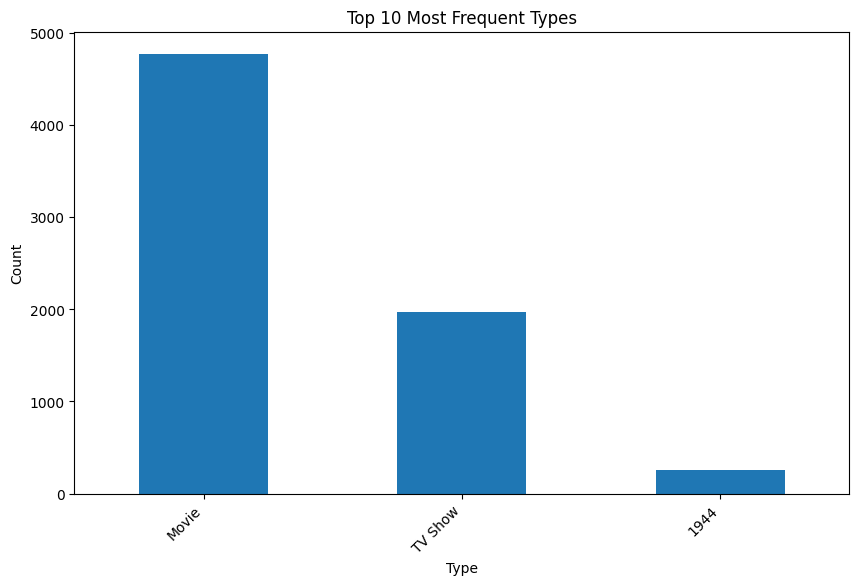

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top10.plot(kind='bar')

plt.title("Top 10 Most Frequent Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

plt.show()

Text(0.5, 1.0, 'Top 10 Most Frequent Genres')

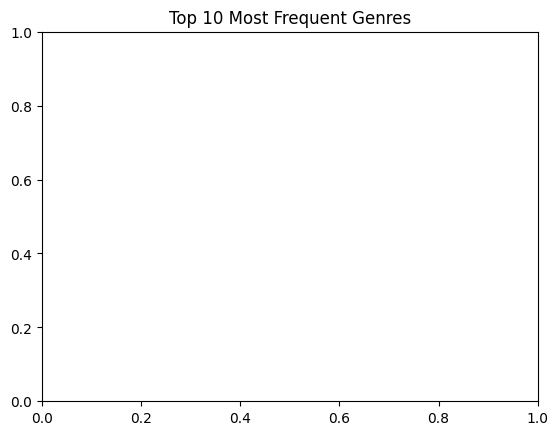

In [84]:
plt.title("Top 10 Most Frequent Genres")


In [85]:
df_merged.to_csv("cleaned_netflix.csv", index=False)


In [ ]:
from flask import Flask, render_template
import pandas as pd

app = Flask(__name__)

@app.route("/")
def home():
    # Load cleaned CSV
    df = pd.read_csv("cleaned_netflix.csv")

    # Top 10 Directors
    # Some rows may have multiple directors separated by commas
    if "director" in df.columns:
        df['director'] = df['director'].astype(str).str.split(", ")
        directors_exploded = df.explode("director")
        top_directors = directors_exploded['director'].value_counts().head(10).to_dict()
    else:
        top_directors = {}

    # Top 10 Countries
    if "country" in df.columns:
        df['country'] = df['country'].astype(str).str.split(", ")
        country_exploded = df.explode("country")
        top_countries = country_exploded['country'].value_counts().head(10).to_dict()
    else:
        top_countries = {}

    # Pass results to template
    return render_template(
        "index.html",
        top_directors=top_directors,
        top_countries=top_countries
    )

if __name__ == "__main__":
    app.run(debug=True)
